In [139]:
import keras
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from pathlib import Path
from keras.utils.np_utils import to_categorical

In [140]:
(X_train, y_train),(X_test, y_test)=cifar10.load_data()

In [141]:
import os 
os.environ['KMP_DUPLICATE_LIB_OK']='True'
#kernel was dying alot , so aftering google a bit. they suggested my to add this to code and kernel won't die

In [142]:
X_train=X_train.astype('float32')
X_test=X_test.astype('float32')
X_train/=255.0
X_test/=255.0

In [143]:
y_train=to_categorical(y_train,10)
y_test=to_categorical(y_test,10)

In [144]:
model=Sequential()
model.add(Conv2D(32,(3,3),padding='same',input_shape=(32,32,3),activation='relu'))
model.add(Conv2D(32,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64,(3,3),padding='same',activation='relu'))
model.add(Conv2D(32,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10,activation='softmax'))

In [145]:
model.compile(
loss='categorical_crossentropy',
optimizer="adam",
metrics=['accuracy'])

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 conv2d_13 (Conv2D)          (None, 30, 30, 32)        9248      
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 dropout_9 (Dropout)         (None, 15, 15, 32)        0         
                                                                 
 conv2d_14 (Conv2D)          (None, 15, 15, 64)        18496     
                                                                 
 conv2d_15 (Conv2D)          (None, 13, 13, 32)        18464     
                                                      

In [146]:
model.fit(
    X_train,
    y_train,
    batch_size=32,
    epochs=10,
    validation_data=(X_test, y_test),
    shuffle=True)

Epoch 1/10
1563/1563 [==============================] - 207s 132ms/step - loss: 1.5737 - accuracy: 0.4206 - val_loss: 1.1842 - val_accuracy: 0.5723
Epoch 2/10
1563/1563 [==============================] - 206s 132ms/step - loss: 1.1736 - accuracy: 0.5802 - val_loss: 0.9873 - val_accuracy: 0.6477
Epoch 3/10
1563/1563 [==============================] - 163s 104ms/step - loss: 1.0112 - accuracy: 0.6410 - val_loss: 0.8767 - val_accuracy: 0.6917
Epoch 4/10
1563/1563 [==============================] - 215s 137ms/step - loss: 0.9245 - accuracy: 0.6739 - val_loss: 0.8230 - val_accuracy: 0.7109
Epoch 5/10
1563/1563 [==============================] - 233s 149ms/step - loss: 0.8618 - accuracy: 0.6973 - val_loss: 0.8029 - val_accuracy: 0.7261
Epoch 6/10
1563/1563 [==============================] - 236s 151ms/step - loss: 0.8182 - accuracy: 0.7140 - val_loss: 0.7542 - val_accuracy: 0.7340
Epoch 7/10
1563/1563 [==============================] - 188s 120ms/step - loss: 0.7880 - accuracy: 0.7224 - val_

In [159]:
model_structure=model.to_json()
f=Path("model_structure.json")
f.write_text(model_structure)

4405

In [160]:
model.save_weights("model_weight.h5")

In [161]:
from keras.models import model_from_json
from pathlib import Path
from keras.preprocessing import image
import numpy as np

In [162]:
class_labels=[
    "Planes",
    "car",
    "Bird",
    "Cat",
    "Deer",
    "Dog",
    "Frog",
    "Horse",
    "Boat",
    "Truck"
]

In [163]:
f=Path("model_structure.json")
model_structure=f.read_text()
model=model_from_json(model_structure)

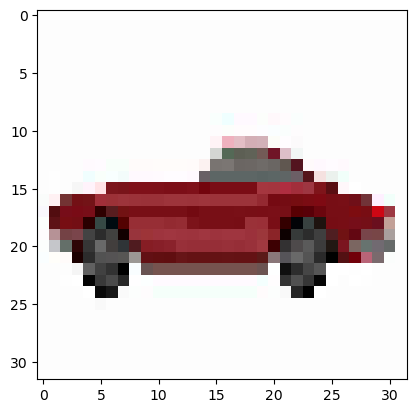

In [164]:
import matplotlib.pyplot as plt
from tensorflow.keras.utils import load_img, img_to_array 
img=load_img(r"C:\Users\mruna\OneDrive\Desktop\car.jpeg",target_size=(32,32))
plt.imshow(img)

In [165]:
from tensorflow.keras.utils import img_to_array
image_to_test=img_to_array(img)
import numpy as np
list_of_images=np.expand_dims(image_to_test,axis=0)

In [166]:
results=model.predict(list_of_images)

1/1 [==============================] - 0s 91ms/step


In [167]:
single_result=results[0]

In [168]:
most_likely_class_index=int(np.argmax(single_result))
class_likelihood=single_result[most_likely_class_index]

In [169]:
class_label=class_labels[most_likely_class_index]

In [170]:
print("This is a image of a {} likelihood: {:2f}".format(class_label, class_likelihood))

This is a image of a car likelihood: 0.999901
